# Procesamiento de datos mediante algoritmos supervisados

## Algoritmos a utilizar:
* KNN
* MLP
* Decision Tree

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,precision_recall_fscore_support

In [2]:
def parametrize(df:pd.DataFrame,scale:int=1)->pd.DataFrame:
        """
        Descripcion: Parametrizar valores en valores del 0 al 4
        Parametros: - df DataFrame
                    - scale int escala de la nota, default 1
        Retorno: DataFrame
        """
        df_new = df.copy()
        for col in df_new.columns:
                try:
                        cols= pd.to_numeric(df_new[col])
                        df_new.loc[cols ==0,col]=0
                        df_new.loc[ (cols<=45/scale) & (cols>0), col]=1
                        df_new.loc[ (cols>45/scale) & (cols <= 55/scale), col]=2
                        df_new.loc[ (cols>55/scale) & (cols <= 65/scale), col]=3
                        df_new.loc[ cols > 65/scale, col]=4
                except:
                        print(col)
        
        return df_new

In [3]:
def evaluate_model(model,x_test_scaled,y_test,zero='warn'):
    """
    Descripcion: Evaluar el modelo entregago con el conjunto de testeo
    Parametros: model instancia del modelo de sklearn
                x_test_scaled arreglo de caracteristicas a evaluar
                y_test listado de valores target
                zero acción cuando se tiene división por 0 en reporte de clasificacion.
    Retorno: Matriz de confusión de clasificacion 
    """
    print(f'Mejor estimador: {model.best_estimator_}')
    print(f'Mejor puntaje: {model.best_score_}')
    print(f'Mejores parametros del modelo: {model.best_params_}')
    y_predict = model.predict(x_test_scaled)
    print("Accuracy:",accuracy_score(y_test, y_predict))
    print(f'Model Score: {model.score(x_test_scaled, y_test)}')
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
    print(classification_report(y_test,y_predict,zero_division=zero))
    return confusion_matrix(y_test, y_predict)

Se lee el archivo csv que contiene llas calificaciones de todos los campus para los periodos de 2020-2 y 2021-1 llamado `All_Rough_data.csv` limpiando los campos que no cuentan datos o que no son viables como lo son SM9 y SM10 que no tienen datos 

In [ ]:
df = pd.read_csv('../All_Rough_data.csv')
df.drop(columns=['SM9','SM10'],inplace=True)

Desde un principio se divide en dos dataframes `_dfx` y `_dfy` donde el primero corresponde al dataframe de las caracteristicas o _features_  para entregar al modelo y el segundo corresponde a las posibles variables objetivos que se le entregan al modelo. Además se cuenta con dos campos de NF, uno que se encuentra parametrizado y otro con sus notas normales (`NF_NP`)

In [4]:
_dfx = df.drop(columns=['Apr','NF','Depto'])

_dfx = _dfx.fillna(0)
_dfy = parametrize(df[['NF']])
_dfy['Apr']= df['Apr']
_dfy['NF_NP']=df['NF']

La división de los conjuntos de entrenamiento y testeo se realizan en la proporción de 70% y 30%

In [5]:
X_train, X_test, y_train, y_test = train_test_split(_dfx.astype('int32') ,_dfy, test_size=0.3, random_state=42)

In [6]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [8]:
# Listado de random_states a utilizar para replicación de modelos generados en primera instancia de manera aleatoria
#random_states = np.random.randint(0,100,size=20)
random_states= [71, 55, 12, 85, 54, 18, 95, 29, 72, 57, 36, 65, 86, 75, 15, 35, 90, 88, 83,  9]

### 1. kNN

Como primer algoritmo que se analiza es el de KNN o K nearest neighbor, utilizando como variables para entrenar el modelo las parametrizaciones de las _features_, recordar que se realizan 20 iteraciones donde cada iteración outiliza un valor de `random_states` para entregar diferentes resultados pero de manera replicable 

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
X_train_param= parametrize(X_train)
x_test_param = parametrize(X_test)

In [38]:
grid_params = {
    'n_neighbors': np.arange(1, 10),
    'weights': ['uniform','distance'],
    'metric': ['euclidean', 'manhattan','minkowski']
}
model_knn = GridSearchCV(
    KNeighborsClassifier(), 
    grid_params,
    verbose=1,
    cv=5,
    n_jobs=-1)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [144]:
knn_models =[]

for states in random_states:
    X_train, X_test, y_train, y_test = train_test_split(_dfx.astype('int32') ,_dfy, test_size=0.3, random_state=states)#42
    X_train_param= parametrize(X_train)
    x_test_param = parametrize(X_test)
    model_knn.fit(X_train_param,y_train['Apr'])
    knn_models.append({
        'model':model_knn.best_estimator_,
        'params': model_knn.best_params_,
        'scores':model_knn.best_score_
    })

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 

In [429]:
metrics = [ model['params']['metric'] for model in knn_models]
vecinos = [ model['params']['n_neighbors'] for model in knn_models]
scores= [ model['scores'] for model in knn_models]
print(f'Promedio Accuracy modelo KNN trainning:{ np.mean(scores)}')
print(f'Frecuencia de metricas:{ {i:metrics.count(i) for i in metrics} }')
print(f'Frecuencia de vecinos:{ {i:vecinos.count(i) for i in vecinos} }')

Promedio Accuracy modelo KNN trainning:0.9155356677900031
Frecuencia de metricas:{'manhattan': 18, 'euclidean': 2}
Frecuencia de vecinos:{4: 7, 1: 1, 5: 4, 8: 1, 7: 3, 9: 1, 6: 2, 3: 1}


De los 20 modelos, se obtuvo que la mejor metrica de distancia es la de manhattan con 4 vecinos 

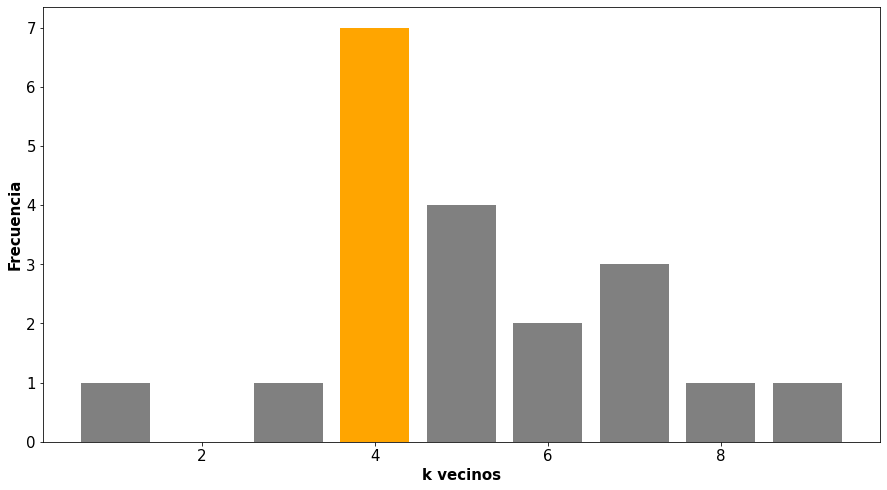

In [168]:
aa ={i:vecinos.count(i) for i in vecinos}
colors = ['grey']*len(aa.keys())
plt.figure(figsize=(15,8),)

colors[np.argmax(aa.values())] = 'orange'
plt.bar(aa.keys(),aa.values(),color=colors)
plt.xlabel('k vecinos',fontdict={'fontsize':15,'fontweight':'bold'})
plt.ylabel('Frecuencia',fontdict={'fontsize':15,'fontweight':'bold'})
plt.tick_params(labelsize=15)
plt.savefig('FreqKnnK.png')

In [173]:
scores = []
accuracy=[]
preccision=[]
recall=[]
for i,state in enumerate(random_states):
    model = knn_models[i]['model']
    X_train, X_test, y_train, y_test = train_test_split(_dfx.astype('int32') ,_dfy, test_size=0.3, random_state=state)#42
    x_test_param = parametrize(X_test)
    y_true= y_test['Apr']
    y_predict = model.predict(x_test_param)
    accuracy.append(accuracy_score(y_true, y_predict))
    scores.append(model.score(x_test_param, y_true))
    precc,rec,f1,_=precision_recall_fscore_support(y_true,y_predict,average='macro',zero_division=0)
    preccision.append(precc)
    recall.append(rec)

In [174]:
print(f'Promedio Accuracy modelo KNN test:{np.mean(accuracy)}')
print(f'Promedio Scores modelo KNN test:{np.mean(scores)}')
print(f'Promedio Preccision modelo KNN test:{np.mean(preccision)}')
print(f'Promedio Recall modelo KNN test:{np.mean(recall)}')

Promedio Accuracy modelo KNN test:0.9165017985611511
Promedio Scores modelo KNN test:0.9165017985611511
Promedio Preccision modelo KNN test:0.9025189923187827
Promedio Recall modelo KNN test:0.791736512082945


Para evaluar el mejor modelo obtenido se vuelve a entrenar y testear ahora solo utilizando un modelo y obtener las matrices de confusión

In [181]:
X_train, X_test, y_train, y_test = train_test_split(_dfx.astype('int32') ,_dfy, test_size=0.3, random_state=random_states[np.argmax(scores)])
x_test_param = parametrize(X_test)

In [182]:
y_pred = knn_models[np.argmax(scores)]['model'].predict(x_test_param)

In [183]:
cm = confusion_matrix(y_test['Apr'], y_pred)

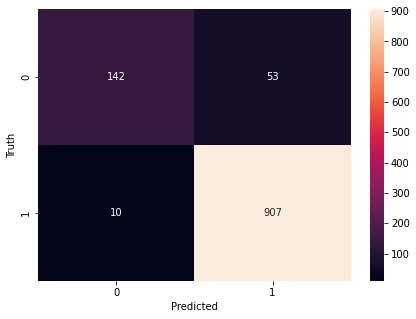

In [184]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True,fmt='0g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('ConfusonMatrixKNNAprMax.png')

### 2. MLP

In [17]:
from sklearn.neural_network import MLPClassifier

In [18]:
layers = [(i,) for i in range(120,151,10)]
params = {
    'hidden_layer_sizes': layers,
    'activation':['tanh','relu','logistic'],
}
model_mlp = GridSearchCV(
    MLPClassifier(random_state=42,solver='adam',max_iter=1000,learning_rate_init=1e-2),
    params, 
    n_jobs=-1,
    cv=5,
    verbose=1,
    scoring='accuracy'
)


In [19]:
mlp_models =[]

for states in random_states:
    X_train, X_test, y_train, y_test = train_test_split(_dfx.astype('int32') ,_dfy, test_size=0.3, random_state=states)
    #X_train_param= parametrize(X_train)
    x_train_scaled= StandardScaler().fit_transform(X_train)
    model_mlp.fit(x_train_scaled,y_train['Apr'].values)
    mlp_models.append({
        'model':model_mlp.best_estimator_,
        'params': model_mlp.best_params_,
        'scores':model_mlp.best_score_
    })

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each

In [20]:
metrics = [ model['params']['activation'] for model in mlp_models]
vecinos = [ model['params']['hidden_layer_sizes'] for model in mlp_models]
scores = [model['scores'] for model in mlp_models]

print(f'Promedio Accuracy modelo KNN trainning:{ np.mean(scores)}')
print(f'Frecuencia de función activación :{ {i:metrics.count(i) for i in metrics} }')
print(f'Frecuencia de capas internas:{ {i:vecinos.count(i) for i in vecinos} }')

Promedio Accuracy modelo KNN trainning:0.9702384300072163
Frecuencia de función activación :{'tanh': 15, 'logistic': 3, 'relu': 2}
Frecuencia de capas internas:{(130,): 8, (120,): 4, (150,): 7, (140,): 1}


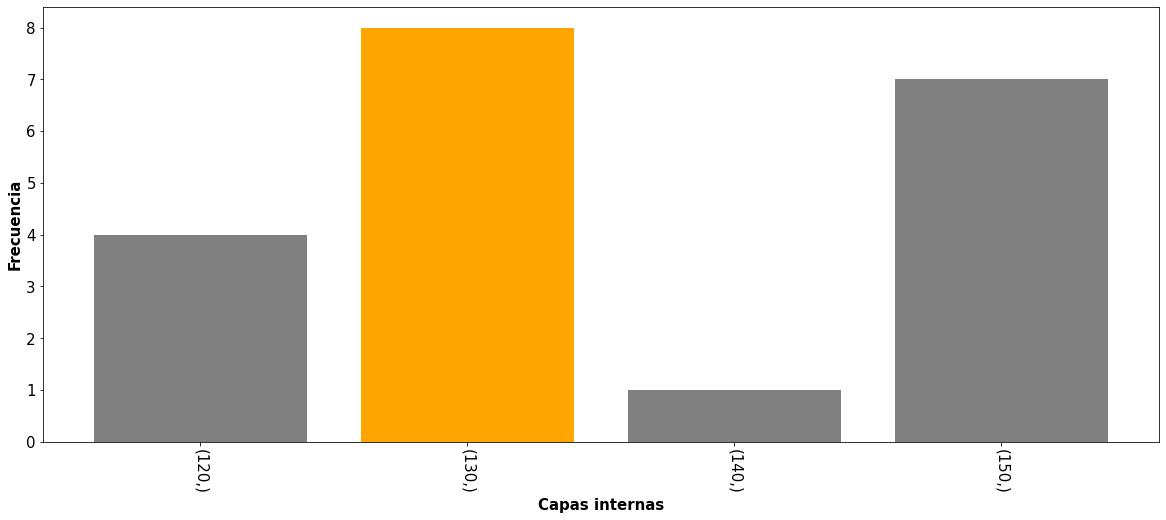

In [504]:
aa ={j:vecinos.count(j) for j in layers}
colors = ['grey']*len(aa.keys())
colors[np.argmax([*aa.values()])]= 'orange'
plt.figure(figsize=(20,8),)
plt.bar( [ str(i) for i in aa.keys()],aa.values(),color=colors)
plt.xlabel('Capas internas',fontdict={'fontsize':15,'fontweight':'bold'})
plt.ylabel('Frecuencia',fontdict={'fontsize':15,'fontweight':'bold'})
plt.tick_params(labelsize=15)
plt.xticks(rotation=-90)
#plt.show()
plt.savefig('FreqMLPAprv2.png')

In [506]:
np.max(accuracy)

0.9811151079136691

In [505]:
scores = []
accuracy=[]
preccision=[]
recall=[]
for i,state in enumerate(random_states):
    model = mlp_models[i]['model']
    X_train, X_test, y_train, y_test = train_test_split(_dfx.astype('int32') ,_dfy, test_size=0.3, random_state=state)#42
    scale = StandardScaler().fit(X_train)
    x_test_param = scale.transform(X_test)
    y_true= y_test['Apr'].values
    y_predict = model.predict(x_test_param)
    accuracy.append(accuracy_score(y_true, y_predict))
    scores.append(model.score(x_test_param, y_true))
    precc,rec,f1,_=precision_recall_fscore_support(y_true,y_predict,average='macro',zero_division=0)
    preccision.append(precc)
    recall.append(rec)

In [508]:
print(f'Promedio Accuracy modelo MLP test:{np.mean(accuracy)}')
print(f'Promedio Scores modelo MLP test:{np.mean(scores)}')
print(f'Promedio Preccision modelo MLP test:{np.mean(preccision)}')
print(f'Promedio Recall modelo MLP test:{np.mean(recall)}')

Promedio Accuracy modelo MLP test:0.9731115107913668
Promedio Scores modelo MLP test:0.9731115107913668
Promedio Preccision modelo MLP test:0.9636102363914235
Promedio Recall modelo MLP test:0.9410229507190893


In [497]:
X_train, X_test, y_train, y_test = train_test_split(_dfx.astype('int32') ,_dfy, test_size=0.3, random_state=random_states[np.argmin(scores)])
scale = StandardScaler().fit(X_train)
x_test_param = scale.transform(X_test)
y_true= y_test['Apr'].values

In [498]:
y_pred = mlp_models[np.argmin(scores)]['model'].predict(x_test_param)

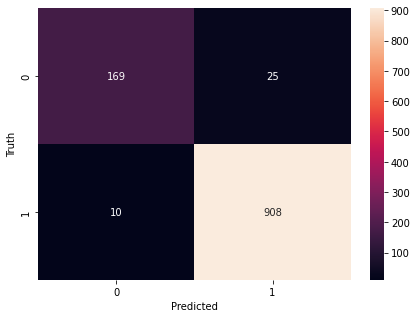

In [499]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(confusion_matrix(y_true,y_pred), annot=True,fmt='0g',xticklabels=y_train['Apr'].sort_values().unique(),yticklabels=y_train['Apr'].sort_values().unique())
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('ConfusonMatrixMLPNFunoMin.png')

### 3. Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
params_tree={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth': [8,9,11],#np.arange(2,20,1),
    'min_samples_split':np.arange(2,10,2),
    'min_samples_leaf':np.arange(2,10,2),
}
model_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=42),#,min_samples_leaf=1,min_samples_split=2),
    params_tree,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy',
    return_train_score=True
)

In [11]:
%%time
dfx_dummies = pd.get_dummies(data = _dfx, columns=['Carrera'],drop_first=True)
tree_models =[]
for states in random_states:
    X_train, X_test, y_train, y_test = train_test_split(dfx_dummies.astype('int32') ,_dfy, test_size=0.3, random_state=states)
    model_tree.fit(X_train,y_train['Apr'])
    tree_models.append({
        'model':model_tree.best_estimator_,
        'params': model_tree.best_params_,
        'scores':model_tree.best_score_,
    })

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 192 candidates, totalling 9

In [12]:
df_tree= pd.DataFrame()

df_tree = df_tree.append( 
    [ 
        {**model['params'],
         **{'scores':model['scores']}
        } for model in tree_models
    ],
    ignore_index=True)
df_tree.head()

criterion  max_depth  min_samples_leaf  min_samples_split splitter    scores
0   entropy         11                 2                  2     best  0.968774
1   entropy         11                 2                  6     best  0.966847
2      gini         11                 4                  2     best  0.963763
3   entropy         11                 2                  2     best  0.962216
4      gini          8                 2                  6     best  0.960685

In [13]:
df_tree.min_samples_split.value_counts()

2    12
6     7
8     1
Name: min_samples_split, dtype: int64

In [118]:
print(df_tree.groupby('max_depth').agg(Frecuencia=pd.NamedAgg('criterion','count'), exactitud_promedio=pd.NamedAgg('scores','mean'), desviación_promedio =pd.NamedAgg('scores','std')).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Frecuencia &  exactitud\_promedio &  desviación\_promedio \\
max\_depth &             &                     &                      \\
\midrule
8         &           7 &            0.962222 &             0.004259 \\
9         &           6 &            0.964147 &             0.003854 \\
11        &           7 &            0.964808 &             0.002797 \\
\bottomrule
\end{tabular}



In [14]:
print(f'Promedio Accuracy modelo Tree trainning:{ df_tree.scores.mean() }')
print(f'Frecuencia de criterio impuridad :{ df_tree.criterion.value_counts().to_dict() }')
print(f'Frecuencia de profundidad maxima:{ df_tree.max_depth.value_counts().to_dict() }')
print('Frecuencia combinación criterio de calidad división y maxima profundidad')
print( df_tree[['criterion','max_depth']].value_counts().to_dict() )

Promedio Accuracy modelo Tree trainning:0.9637044806987003
Frecuencia de criterio impuridad :{'entropy': 16, 'gini': 4}
Frecuencia de profundidad maxima:{11: 7, 8: 7, 9: 6}
Frecuencia combinación criterio de calidad división y maxima profundidad
{('entropy', 11): 6, ('entropy', 8): 5, ('entropy', 9): 5, ('gini', 8): 2, ('gini', 9): 1, ('gini', 11): 1}


In [15]:
scores = []
accuracy=[]
preccision=[]
recall=[]
for i,state in enumerate(random_states):
    model = tree_models[i]['model']
    X_train, X_test, y_train, y_test = train_test_split(dfx_dummies.astype('int32') ,_dfy, test_size=0.3, random_state=state)#42
    y_true= y_test['Apr']
    y_predict = model.predict(X_test)
    accuracy.append(accuracy_score(y_true, y_predict))
    scores.append(model.score(X_test, y_true))
    precc,rec,f1,_=precision_recall_fscore_support(y_true,y_predict,average='macro',zero_division=0)
    preccision.append(precc)
    recall.append(rec)

In [16]:
print(f'Promedio Accuracy modelo MLP test:{np.mean(accuracy)}')
print(f'Promedio Scores modelo MLP test:{np.mean(scores)}')
print(f'Promedio Preccision modelo MLP test:{np.mean(preccision)}')
print(f'Promedio Recall modelo MLP test:{np.mean(recall)}')

Promedio Accuracy modelo MLP test:0.9651079136690648
Promedio Scores modelo MLP test:0.9651079136690648
Promedio Preccision modelo MLP test:0.9380883222603288
Promedio Recall modelo MLP test:0.9404130456526495


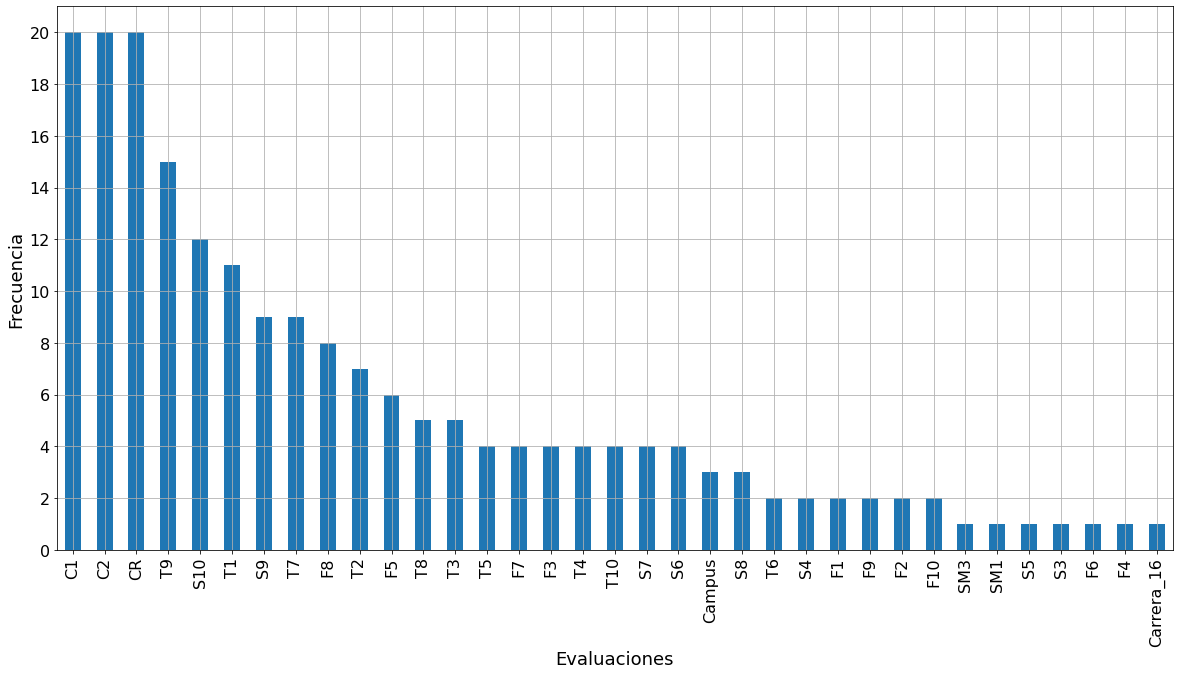

In [17]:
df_importances = pd.DataFrame({'Evaluaciones':dfx_dummies.columns})
df_importances.set_index('Evaluaciones',inplace=True)
for index,model in enumerate(tree_models):
    df_importances[f'Model_{index}']= model['model'].feature_importances_
g= df_importances.apply(lambda x: x.nlargest(10)).count(axis=1).to_frame().sort_values(0,ascending=False).plot.bar(
    figsize=(20,10),
    fontsize=16,
    grid=True,
    legend=False,
    yticks=np.arange(0,21,2))
g.set_ylabel('Frecuencia',fontdict={'fontsize':18})
g.set_xlabel('Evaluaciones',fontdict={'fontsize':18})
plt.savefig('FreqImportanciaEvalApr.png')

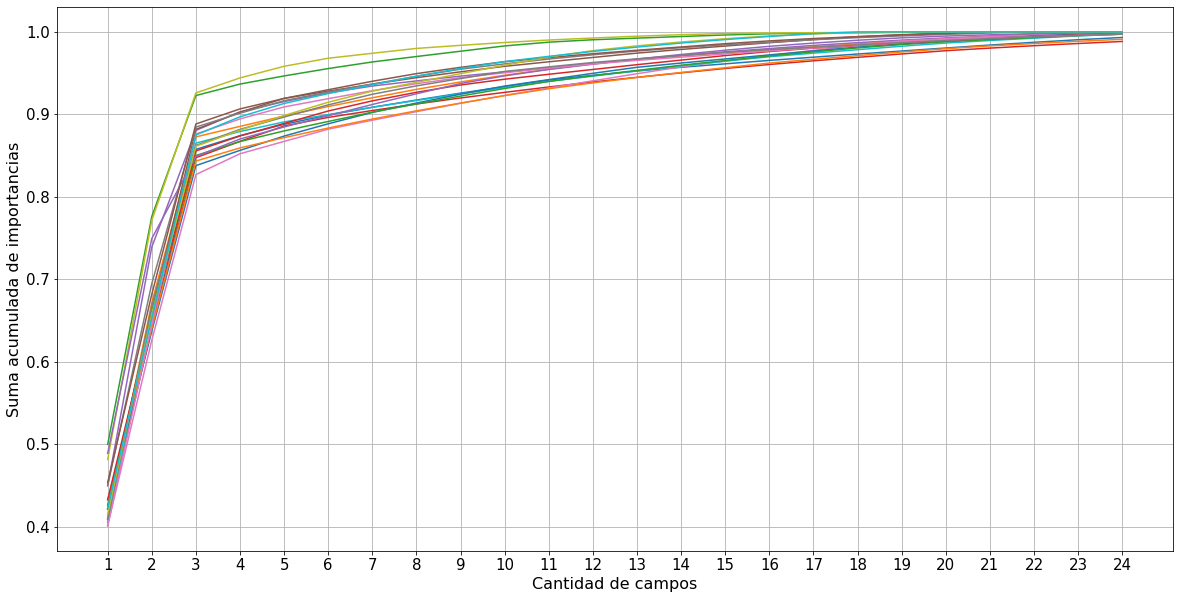

In [125]:
values = pd.DataFrame(index=range(1,25))
for i in range(1,25):
    values.loc[i, [f'Modelo {j}' for j in range(1,21)]] = df_importances.apply(lambda x: x.nlargest(i)).sum().values
g = values.plot(grid=True,legend=False,xticks=range(1,25),figsize=(20,10),fontsize=15)
g.set_xlabel('Cantidad de campos',fontdict={'fontsize':16})
g.set_ylabel('Suma acumulada de importancias',fontdict={'fontsize':16})
plt.savefig('DT_importanciasApr.png')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(dfx_dummies.astype('int32') ,_dfy, test_size=0.3, random_state=42)
y_true= y_test['Apr'].values

In [19]:
y_pred = tree_models[np.argmin(scores)]['model'].predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       202
           1       0.99      0.99      0.99       910

    accuracy                           0.98      1112
   macro avg       0.97      0.97      0.97      1112
weighted avg       0.98      0.98      0.98      1112



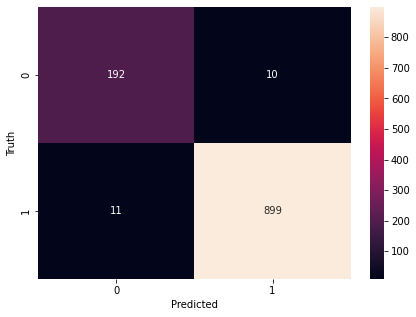

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(confusion_matrix(y_true,y_pred), annot=True,fmt='0g',xticklabels=y_train['Apr'].sort_values().unique(),yticklabels=y_train['Apr'].sort_values().unique())
plt.xlabel('Predicted')
plt.ylabel('Truth')
#plt.savefig('DTConfusionAprMax.png')
print(classification_report(y_true,y_pred))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(dfx_dummies.astype('int32') ,_dfy, test_size=0.3, random_state=42)
clf= DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=11,min_samples_leaf=2,min_samples_split=2,random_state=42)
clf.fit(X_train,y_train['Apr'])

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       random_state=42)

In [21]:
df_trees= pd.DataFrame({'Eval':X_train.columns, 'DT':clf.feature_importances_})

In [22]:
df_trees.nlargest(15,columns='DT')

Eval        DT
1    C2  0.421904
2    CR  0.236787
0    C1  0.198386
31   T9  0.022724
30   T8  0.020153
14   F2  0.013612
11   S9  0.010122
12  S10  0.009599
17   F5  0.007135
20   F8  0.006929
5    S3  0.006679
3    S1  0.005293
22  F10  0.005070
10   S8  0.004901
23   T1  0.004589

In [50]:
clf.tree_.apply(np.ndarray(1,dtype=np.float32))

ValueError: Buffer has wrong number of dimensions (expected 2, got 1)

In [24]:
from sklearn.tree import plot_tree

[Text(515.5434782608695, 868.25, 'C2 <= 50.5\nsamples = 100.0%\nvalue = [0.165, 0.835]\nclass = 1'),
 Text(229.1304347826087, 792.75, 'C1 <= 58.5\nsamples = 30.3%\nvalue = [0.48, 0.52]\nclass = 1'),
 Text(77.5, 717.25, 'CR <= 58.5\nsamples = 14.2%\nvalue = [0.762, 0.238]\nclass = 0'),
 Text(26.956521739130434, 641.75, 'C2 <= 46.5\nsamples = 9.6%\nvalue = [0.996, 0.004]\nclass = 0'),
 Text(13.478260869565217, 566.25, 'samples = 9.2%\nvalue = [1.0, 0.0]\nclass = 0'),
 Text(40.43478260869565, 566.25, 'CR <= 51.0\nsamples = 0.4%\nvalue = [0.909, 0.091]\nclass = 0'),
 Text(26.956521739130434, 490.75, 'samples = 0.3%\nvalue = [1.0, 0.0]\nclass = 0'),
 Text(53.91304347826087, 490.75, 'samples = 0.1%\nvalue = [0.5, 0.5]\nclass = 0'),
 Text(128.04347826086956, 641.75, 'S10 <= 36.5\nsamples = 4.6%\nvalue = [0.269, 0.731]\nclass = 1'),
 Text(94.34782608695652, 566.25, 'S8 <= 75.0\nsamples = 0.5%\nvalue = [0.846, 0.154]\nclass = 0'),
 Text(80.8695652173913, 490.75, 'samples = 0.4%\nvalue = [1.0, 0

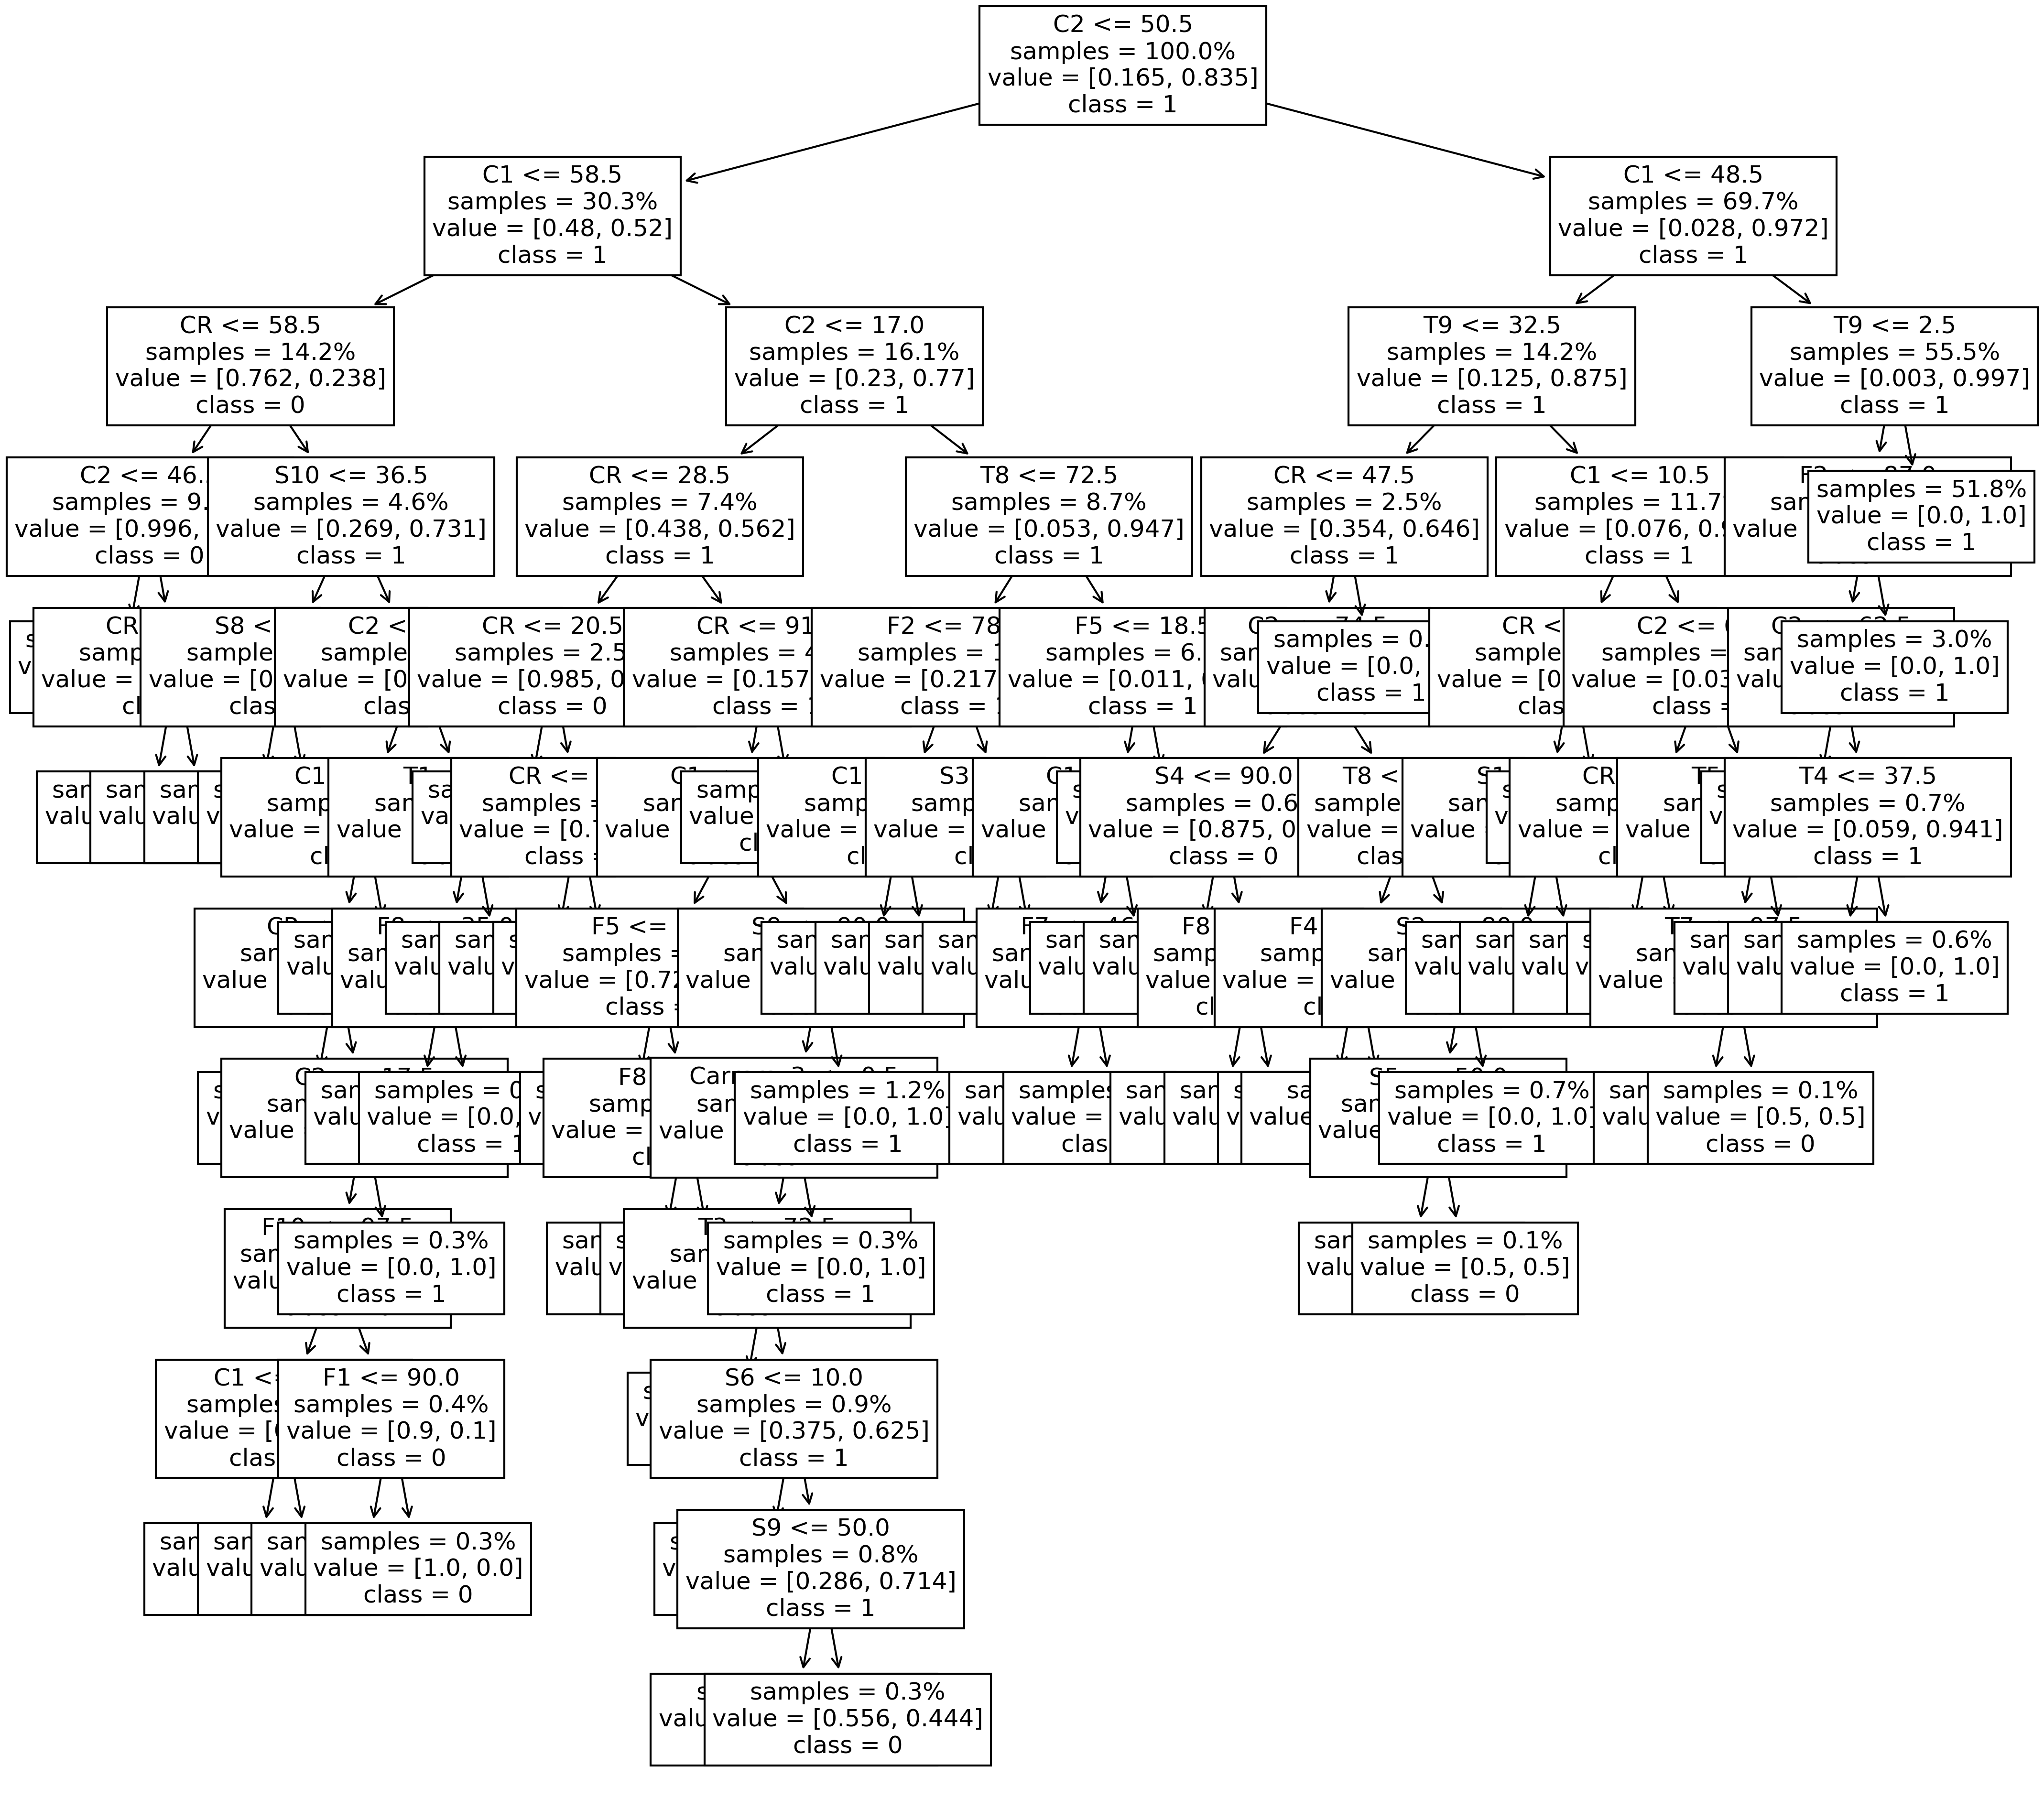

In [30]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
aa= plot_tree(clf),fontsize=12,feature_names=dfx_dummies.columns,class_names=['0','1'],impurity=False,proportion=True)

aa[:20]
#fig.savefig('holaa.png',bbox_inches='tight')

In [55]:
!pip install graphviz

You should consider upgrading via the '/home/diego/.pyenv/versions/3.7.2/envs/memoria/bin/python3.7 -m pip install --upgrade pip' command.


In [56]:
import graphviz
from sklearn import tree

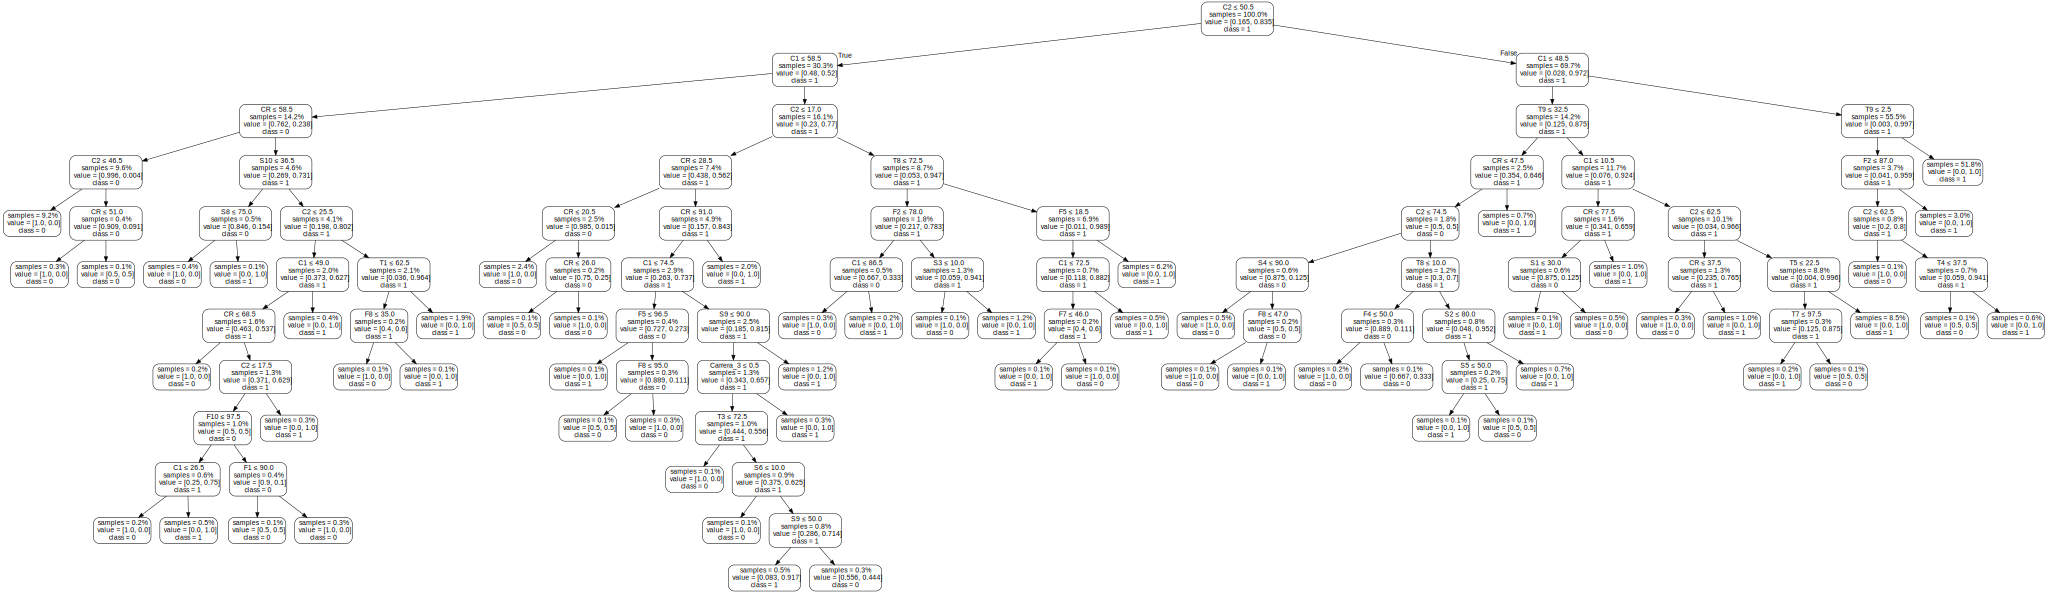

In [67]:
d = tree.export_graphviz(clf, out_file=None,filled=False,rounded=True,special_characters=True,proportion=True,impurity=False,feature_names=dfx_dummies.columns,class_names=['0','1'])
graph=graphviz.Source(d,)
graph.
#graph.render('test.png')

## Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [69]:
params_rd={
    'criterion':['gini','entropy'],
    'max_depth': np.arange(2,20,2),
    #'min_samples_split':np.arange(2,10,2),
    #'min_samples_leaf':np.arange(2,10,2),
}
model_random = GridSearchCV(
    RandomForestClassifier(n_estimators=200,random_state=42,min_samples_leaf=2,min_samples_split=2),
    params_rd,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy',
    return_train_score=True
)

In [70]:
%%time
dfx_dummies = _dfx
rd_models =[]
for states in random_states:
    X_train, X_test, y_train, y_test = train_test_split(dfx_dummies.astype('int32') ,_dfy, test_size=0.3, random_state=states)
    model_random.fit(X_train.values,y_train['Apr'])
    rd_models.append({
        'model':model_random.best_estimator_,
        'params': model_random.best_params_,
        'scores':model_random.best_score_,
    })

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each

In [71]:
df_rd = pd.DataFrame().append( 
    [ 
        {**model['params'],
         **{'scores':model['scores']}
        } for model in rd_models
    ],
    ignore_index=True)
df_rd

criterion  max_depth    scores
0    entropy         18  0.959137
1       gini         14  0.959135
2       gini         16  0.955666
3       gini         18  0.956055
4       gini         14  0.953356
5       gini         14  0.954125
6    entropy         18  0.954125
7    entropy         14  0.953737
8       gini         16  0.953739
9    entropy         16  0.955667
10   entropy         14  0.953737
11      gini         12  0.954509
12   entropy         14  0.959523
13      gini         16  0.954121
14      gini         16  0.959520
15      gini         14  0.959908
16   entropy         14  0.958358
17      gini         16  0.949884
18      gini         16  0.957591
19   entropy         14  0.960294

In [72]:
print(
    df_rd.groupby('max_depth')
    .agg(
        Frecuencia=pd.NamedAgg('criterion','count'),
        exactitud_promedio=pd.NamedAgg('scores','mean'),
        desviación_promedio =pd.NamedAgg('scores','std')
    ).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Frecuencia &  exactitud\_promedio &  desviación\_promedio \\
max\_depth &             &                     &                      \\
\midrule
12        &           1 &            0.954509 &                  NaN \\
14        &           9 &            0.956908 &             0.003059 \\
16        &           7 &            0.955170 &             0.003065 \\
18        &           3 &            0.956439 &             0.002528 \\
\bottomrule
\end{tabular}



In [73]:
print(f'Promedio Accuracy modelo Tree trainning:{ df_rd.scores.mean() }')
print(f'Frecuencia 0 criterio impuridad :{ df_rd.criterion.value_counts().to_dict() }')
print(f'Frecuencia de profundidad maxima:{ df_rd.max_depth.value_counts().to_dict() }')
print('Frecuencia combinación criterio de calidad división y maxima profundidad')
print( df_rd[['criterion','max_depth']].value_counts().to_dict() )

Promedio Accuracy modelo Tree trainning:0.9561094248666503
Frecuencia 0 criterio impuridad :{'gini': 12, 'entropy': 8}
Frecuencia de profundidad maxima:{14: 9, 16: 7, 18: 3, 12: 1}
Frecuencia combinación criterio de calidad división y maxima profundidad
{('gini', 16): 6, ('entropy', 14): 5, ('gini', 14): 4, ('entropy', 18): 2, ('entropy', 16): 1, ('gini', 12): 1, ('gini', 18): 1}


In [74]:
scores = []
accuracy=[]
preccision=[]
recall=[]
for i,state in enumerate(random_states):
    model = rd_models[i]['model']
    X_train, X_test, y_train, y_test = train_test_split(dfx_dummies.astype('int32') ,_dfy, test_size=0.3, random_state=state)#42
    y_true= y_test['Apr']
    y_predict = model.predict(X_test.values)
    accuracy.append(accuracy_score(y_true, y_predict))
    scores.append(model.score(X_test.values, y_true))
    precc,rec,f1,_=precision_recall_fscore_support(y_true,y_predict,average='macro',zero_division=0)
    preccision.append(precc)
    recall.append(rec)

In [75]:
print(f'Promedio Accuracy modelo MLP test:{np.mean(accuracy)}')
print(f'Promedio Scores modelo MLP test:{np.mean(scores)}')
print(f'Promedio Preccision modelo MLP test:{np.mean(preccision)}')
print(f'Promedio Recall modelo MLP test:{np.mean(recall)}')

Promedio Accuracy modelo MLP test:0.9611061151079137
Promedio Scores modelo MLP test:0.9611061151079137
Promedio Preccision modelo MLP test:0.9677231416409633
Promedio Recall modelo MLP test:0.895075016433607


In [76]:
X_train, X_test, y_train, y_test = train_test_split(_dfx.astype('int32') ,_dfy, test_size=0.3, random_state=random_states[np.argmin(scores)])
y_true= y_test['Apr']
y_pred = rd_models[np.argmin(scores)]['model'].predict(X_test.values)

              precision    recall  f1-score   support

           0       0.93      0.76      0.84       185
           1       0.95      0.99      0.97       927

    accuracy                           0.95      1112
   macro avg       0.94      0.87      0.90      1112
weighted avg       0.95      0.95      0.95      1112



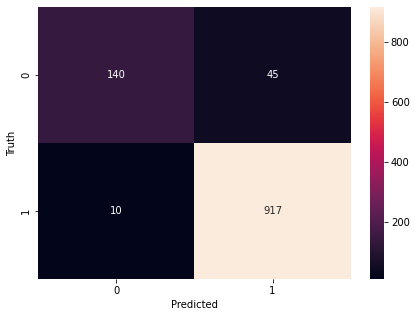

In [286]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(confusion_matrix(y_true,y_pred), annot=True,fmt='0g',xticklabels=y_train['Apr'].sort_values().unique(),yticklabels=y_train['Apr'].sort_values().unique())
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('RFConfusionAprMin.png')
print(classification_report(y_true,y_pred))

In [276]:
_id = np.argmax(scores)
X_train, X_test, y_train, y_test = train_test_split(_dfx.astype('int32') ,_dfy, test_size=0.3, random_state=random_states[_id])
y_true= y_test['NF']
y_pred = rd_models[_id]['model'].predict(X_test.values)

              precision    recall  f1-score   support

         1.0       0.96      0.89      0.93       142
         2.0       1.00      0.30      0.46        37
         3.0       0.93      0.62      0.75        66
         4.0       0.94      1.00      0.97       867

    accuracy                           0.94      1112
   macro avg       0.96      0.70      0.77      1112
weighted avg       0.94      0.94      0.93      1112



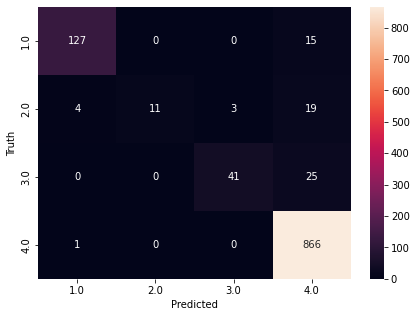

In [277]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(confusion_matrix(y_true,y_pred), annot=True,fmt='0g',xticklabels=y_train['NF'].sort_values().unique(),yticklabels=y_train['NF'].sort_values().unique())
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('RFConfusionNFMax.png')
print(classification_report(y_true,y_pred))

In [310]:
df_importances = pd.DataFrame({'Evaluaciones':dfx_dummies.columns})
df_importances.set_index('Evaluaciones',inplace=True)
for index,model in enumerate(rd_models):
    df_importances[f'Model_{index}']= model['model'].feature_importances_

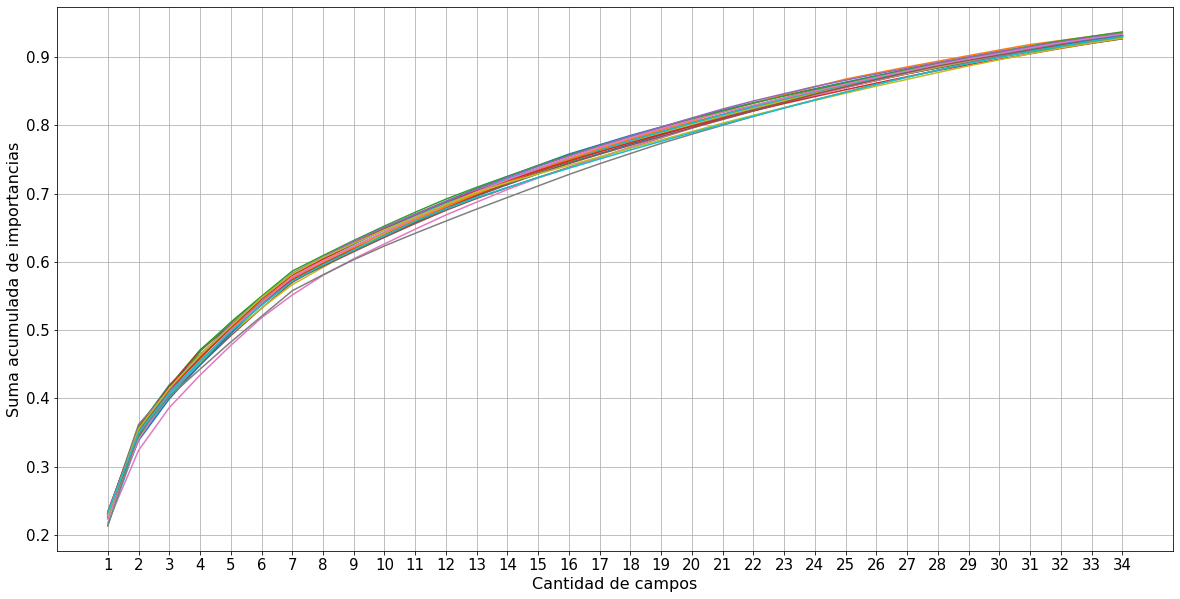

In [311]:
values = pd.DataFrame(index=range(1,35))
for i in range(1,35):
    values.loc[i, [f'Modelo {j}' for j in range(1,21)]] = df_importances.apply(lambda x: x.nlargest(i)).sum().values
g = values.plot(grid=True,legend=False,xticks=range(1,35),figsize=(20,10),fontsize=15)
g.set_xlabel('Cantidad de campos',fontdict={'fontsize':16})
g.set_ylabel('Suma acumulada de importancias',fontdict={'fontsize':16})
plt.savefig('RF_importanciasApr.png')

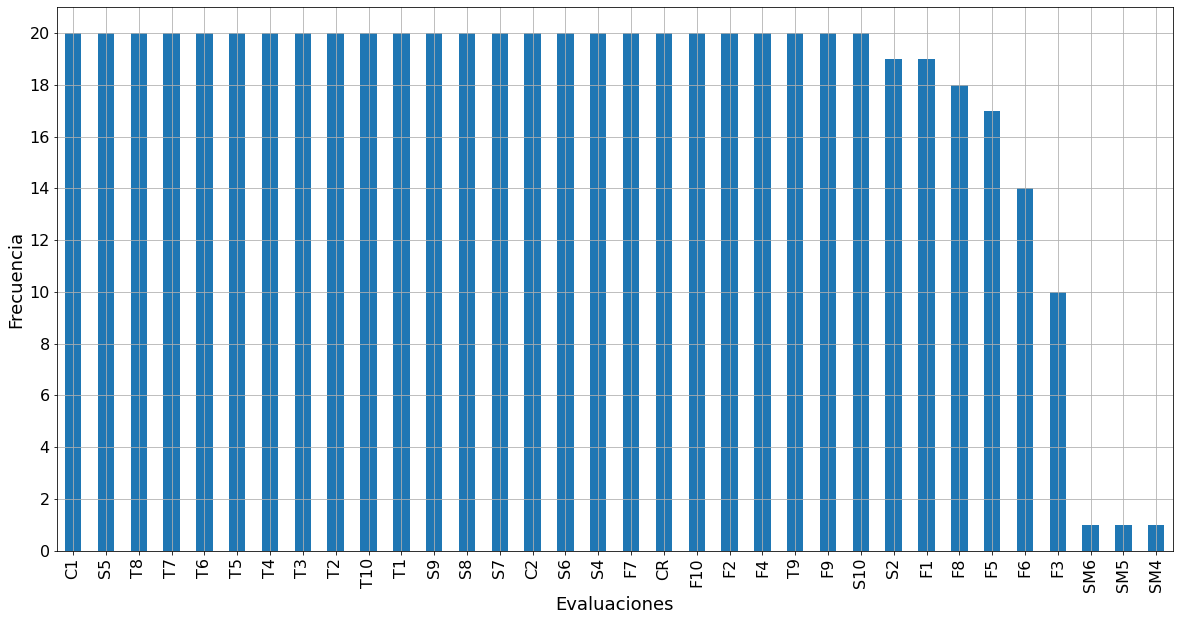

In [313]:

g= df_importances.apply(lambda x: x.nlargest(30)).count(axis=1).to_frame().sort_values(0,ascending=False).plot.bar(
    figsize=(20,10),
    fontsize=16,
    grid=True,
    legend=False,
    yticks=np.arange(0,21,2))
g.set_ylabel('Frecuencia',fontdict={'fontsize':18})
g.set_xlabel('Evaluaciones',fontdict={'fontsize':18})
plt.savefig('FreqImportanciaEvalAprRF.png')

In [318]:
df_importances.apply(lambda x: x.nlargest(30)).shape

(34, 20)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(dfx_dummies.astype('int32') ,_dfy, test_size=0.3, random_state=42)
clf= DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=14,min_samples_leaf=2,min_samples_split=2,random_state=42)
clf.fit(X_train,y_train['Apr'])

DecisionTreeClassifier(max_depth=14, min_samples_leaf=2, random_state=42)

In [319]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,4), dpi=300)
plot_tree(clf,fontsize=12,feature_names=dfx_dummies.columns,class_names=['0','1'],impurity=False,proportion=True)
fig.savefig('randomforestAbrol.png',bbox_inches='tight')

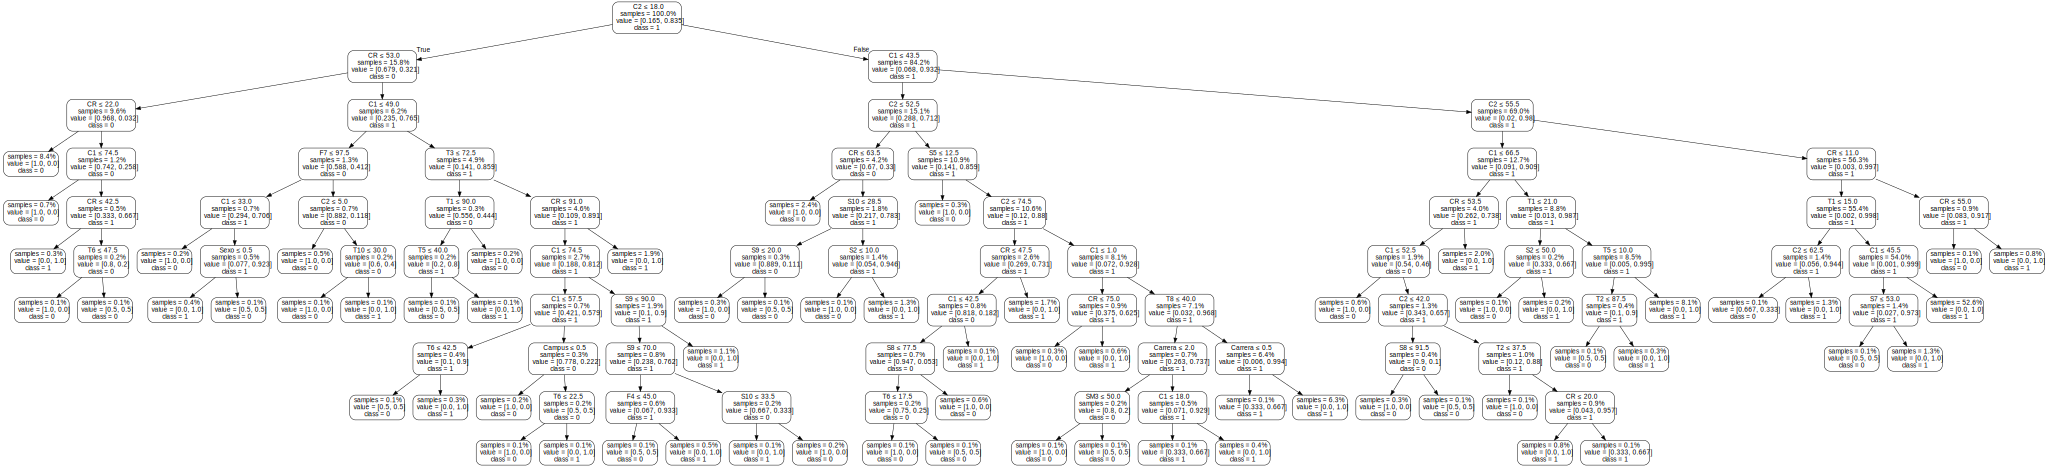

In [79]:
d = tree.export_graphviz(clf, out_file=None,filled=False,rounded=True,special_characters=True,proportion=True,impurity=False,feature_names=dfx_dummies.columns,class_names=['0','1'])
graph=graphviz.Source(d,)
graph
#graph.render('rf_arbol')